#### Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

#### Configuration

In [2]:
DATA_PATH = '../training.1600000.processed.noemoticon.csv'
DATA_ENCODING = 'ISO-8859-1'
DATA_COLUMN_NAMES = ['target', 'id', 'date', 'flag', 'user', 'text']
TEXT_VAR = 'text'
TARGET_VAR = 'target'
VALIDATION_SIZE = 0.2
TEST_SIZE = 0.2
RANDOM_STATE = 42

#### Import Data File

In [3]:
df = pd.read_csv(DATA_PATH, encoding=DATA_ENCODING, names=DATA_COLUMN_NAMES)
df = df[[TEXT_VAR, TARGET_VAR]]
print(df.shape)
df.head()

(1600000, 2)


,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


#### Missing Values

In [20]:
df.isnull().sum()

text        0
target      0
text_len    0
word_n      0
dtype: int64

#### Tweets Length Distribution

/Users/leon/miniconda3/envs/sam_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='text_len', ylabel='Count'>

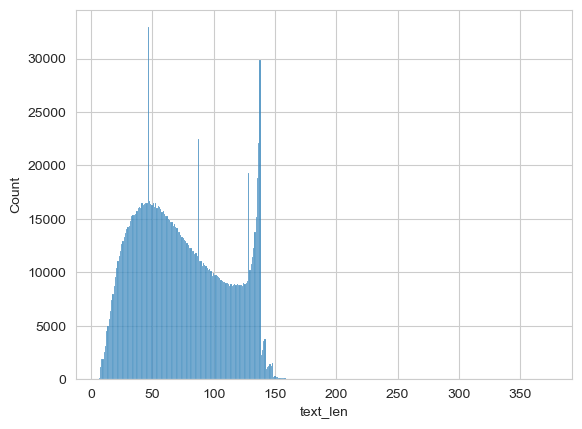

In [4]:
df['text_len'] = df[TEXT_VAR].apply(len)
sns.histplot(df['text_len'])

In [5]:
df['text_len'].describe()

count    1.600000e+06
mean     7.409011e+01
std      3.644114e+01
min      6.000000e+00
25%      4.400000e+01
50%      6.900000e+01
75%      1.040000e+02
max      3.740000e+02
Name: text_len, dtype: float64

/Users/leon/miniconda3/envs/sam_venv/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='word_n', ylabel='Count'>

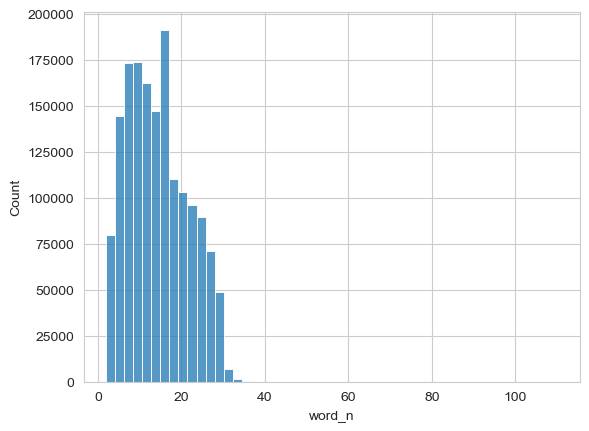

In [6]:
df['word_n'] = df[TEXT_VAR].apply(lambda x: len(x.split(' ')))
sns.histplot(df['word_n'])

In [7]:
df['word_n'].describe()

count    1.600000e+06
mean     1.438213e+01
std      7.062139e+00
min      2.000000e+00
25%      9.000000e+00
50%      1.300000e+01
75%      2.000000e+01
max      1.100000e+02
Name: word_n, dtype: float64

#### Word Frequencies Using WordCloud

(-0.5, 799.5, 599.5, -0.5)

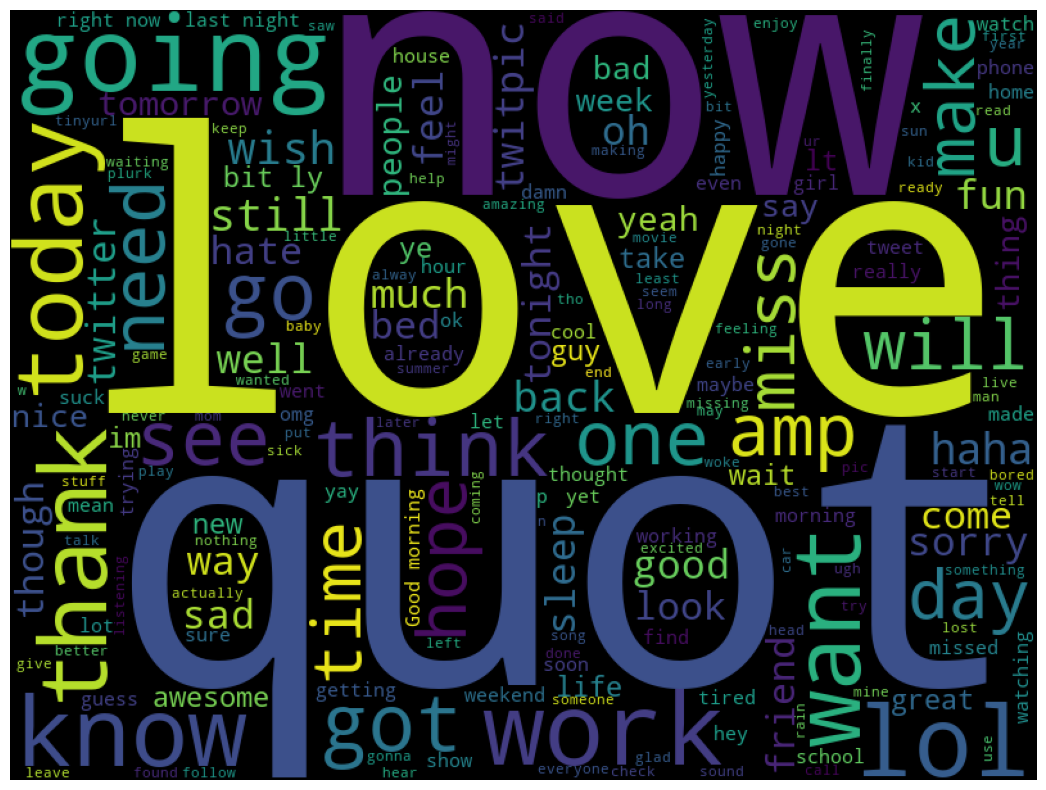

In [8]:
cloud=WordCloud(width=800, height=600).generate(" ".join(df[TEXT_VAR])) 
plt.figure(figsize=(15,10))
plt.imshow(cloud)
plt.axis('off')

#### Target Distribution

/Users/leon/miniconda3/envs/sam_venv/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leon/miniconda3/envs/sam_venv/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leon/miniconda3/envs/sam_venv/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/leon/miniconda3/envs/sam_venv/lib/python3.9/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na opti

<Axes: xlabel='target', ylabel='word_n'>

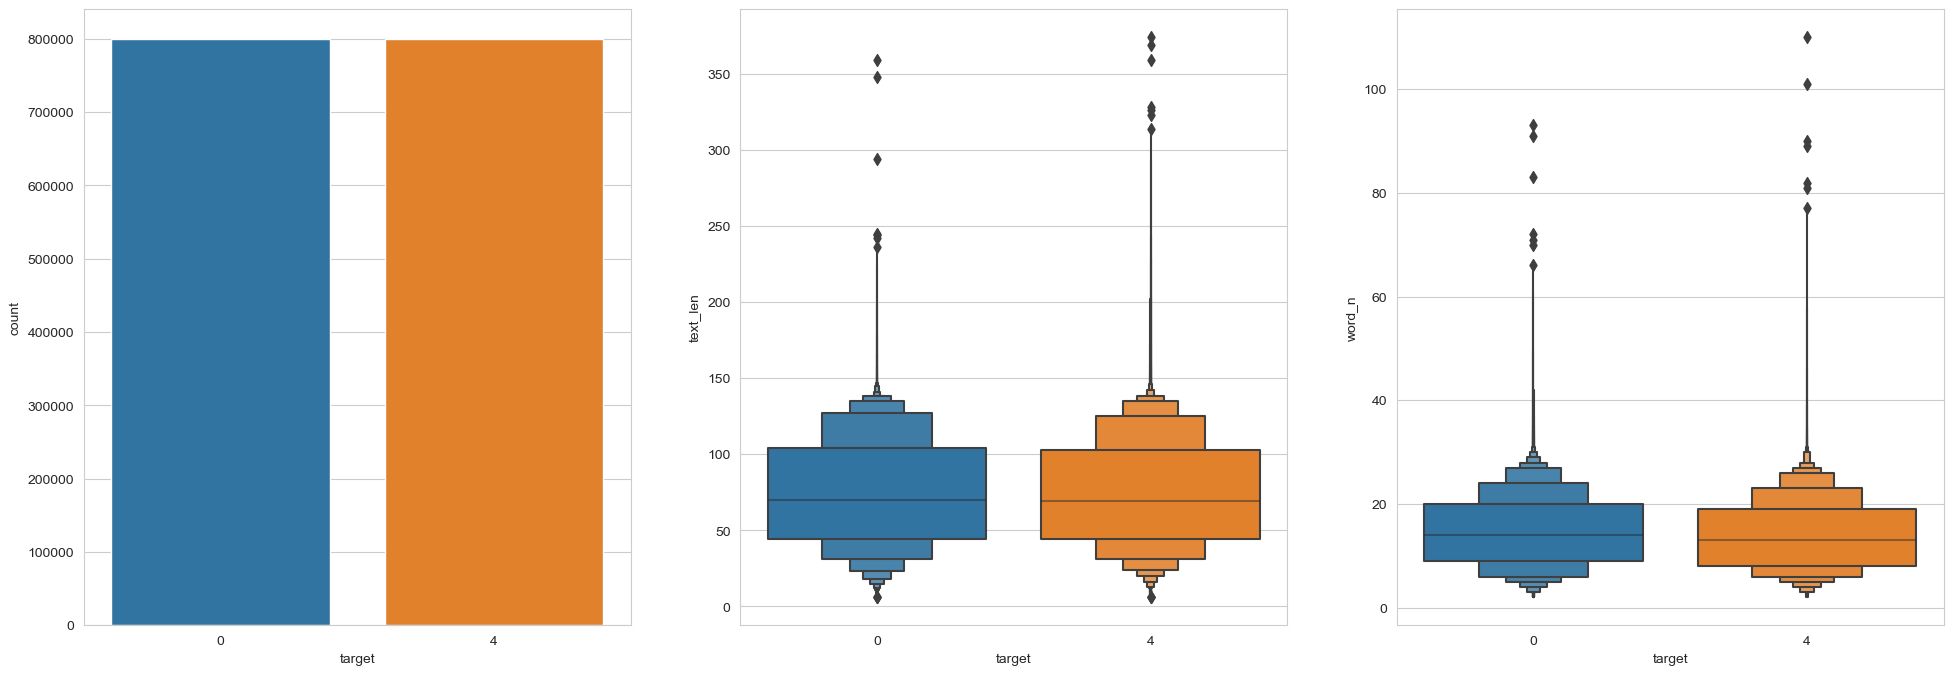

In [17]:
fig, axe = plt.subplots(nrows=1, ncols=3, figsize=(24,8))
sns.countplot(data=df, x=TARGET_VAR, ax=axe[0])
sns.boxenplot(data=df, x=TARGET_VAR, y='text_len', ax=axe[1])
sns.boxenplot(data=df, x=TARGET_VAR, y='word_n', ax=axe[2])

#### Count Special Marks and Capital Letters

In [19]:
print('the ratio with question mark is ', np.mean(df[TEXT_VAR].apply(lambda x : '?' in x)))
print('the ratio with fullstop mark is ', np.mean(df[TEXT_VAR].apply(lambda x : '.' in x)))
print('the ratio of the first capital letter is ', np.mean(df[TEXT_VAR].apply(lambda x : x[0].isupper())))
print('the ratio with the capital letter is ', np.mean(df[TEXT_VAR].apply(lambda x : max(y.isupper() for y in x))))
print('the ratio with the number is ', np.mean(df[TEXT_VAR].apply(lambda x : max(y.isdigit() for y in x))))

the ratio with question mark is  0.1045675
the ratio with fullstop mark is  0.517839375
the ratio of the first capital letter is  0.32525125
the ratio with the capital letter is  0.7641725
the ratio with the number is  0.229550625
